In [1]:
import nltk
nltk.download('punkt')
import numpy as np
import heapq
import pandas as pd
import glob
import re
from pathlib import Path
from glob import iglob
import os
import os.path
from os import path
import json
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# baca file data test
pathdatasetR = "/content/drive/My Drive/Project TA/Retronet dataset/RETRONET requirements/"

doc_a = []
for i in range(1,67):
  with open(pathdatasetR + 'R' + str(i) + '.txt', 'r', encoding="utf8") as reader:
    doc_a.append({                                  #object
        'name': 'R' + str(i)+'.txt',
        'values':reader.read()    
        })

In [4]:
# baca file data set
files = "/content/drive/My Drive/Project TA/Retronet dataset/RETRONET Trunk/*.txt"

doc_b = []
for file in iglob(files):
  with open(file, encoding='ISO-8859-1') as f:
    fileName=f.name.split('/')
    text = f.read()
    doc_b.append({
        'name': fileName[7],
        'values': text
    })

In [5]:
# baca file result
filesResult = "/content/drive/My Drive/Project TA/Retronet dataset/result.json"

doc_result = []
with open(filesResult, encoding='ISO-8859-1') as json_file:
    doc_result=json.load(json_file)

In [6]:
# Tokenizing data test
doc_a_word = []
for i in range(len(doc_a)):
  doc_a [i]['values'] = doc_a [i]['values'].lower() # membuat lower case
  doc_a [i]['values'] = re.sub(r'\W',' ',doc_a [i]['values']) # hapus punctuation / tanda baca
  doc_a [i]['values'] = re.sub(r'\s+',' ',doc_a [i]['values']) # hapus spasi berlebih
  doc_a_word.append({
      'name':doc_a[i]['name'],
      'values':nltk.word_tokenize(doc_a[i]['values'])
  })
  print(doc_a_word[i])

{'name': 'R1.txt', 'values': ['the', 'start', 'new', 'project', 'function', 'shall', 'allow', 'the', 'user', 'to', 'create', 'a', 'new', 'project', 'the', 'user', 'shall', 'be', 'prompted', 'to', 'provide', 'the', 'new', 'project', 'name']}
{'name': 'R2.txt', 'values': ['the', 'start', 'new', 'project', 'function', 'shall', 'allow', 'the', 'user', 'to', 'create', 'a', 'new', 'project', 'the', 'user', 'shall', 'be', 'prompted', 'to', 'provide', 'the', 'low', 'level', 'document', 'path']}
{'name': 'R3.txt', 'values': ['the', 'start', 'new', 'project', 'function', 'shall', 'allow', 'the', 'user', 'to', 'create', 'a', 'new', 'project', 'the', 'user', 'shall', 'be', 'prompted', 'to', 'provide', 'the', 'high', 'level', 'document']}
{'name': 'R4.txt', 'values': ['the', 'start', 'new', 'project', 'function', 'shall', 'allow', 'the', 'user', 'to', 'create', 'a', 'new', 'project', 'the', 'user', 'shall', 'optionally', 'be', 'prompted', 'to', 'select', 'an', 'ir', 'method', 'from', 'the', 'follow

In [7]:
# Tokenizing dokumen dataset
doc_b_word = []
for i in range(len(doc_b)):
  doc_b [i]['values'] = doc_b [i]['values'].lower() # membuat lower case
  doc_b [i]['values'] = re.sub(r'\W',' ',doc_b [i]['values']) # hapus punctuation / tanda baca
  doc_b [i]['values'] = re.sub(r'\s+',' ',doc_b [i]['values']) # hapus spasi berlebih
  doc_b_word.append({
      'name':doc_b[i]['name'],
      'values':nltk.word_tokenize(doc_b[i]['values'])
  })
  print(doc_b_word[i])

{'name': 'IDocument.txt', 'values': ['copyright', '2006', '10', 'jody', 'larsen', 'jody', 'larsen', 'uky', 'edu', 'jody', 'larsen', 'gmail', 'com', 'jody', 'dreamfrog', 'com', 'all', 'rights', 'reserved', 'this', 'program', 'is', 'free', 'software', 'you', 'can', 'redistribute', 'it', 'and', 'or', 'modify', 'it', 'under', 'the', 'terms', 'of', 'the', 'gnu', 'lesser', 'general', 'public', 'license', 'as', 'published', 'by', 'the', 'free', 'software', 'foundation', 'either', 'version', '2', '1', 'of', 'the', 'license', 'or', 'at', 'your', 'option', 'any', 'later', 'version', 'this', 'program', 'is', 'distributed', 'in', 'the', 'hope', 'that', 'it', 'will', 'be', 'useful', 'but', 'without', 'any', 'warranty', 'without', 'even', 'the', 'implied', 'warranty', 'of', 'merchantability', 'or', 'fitness', 'for', 'a', 'particular', 'purpose', 'see', 'the', 'gnu', 'lesser', 'general', 'public', 'license', 'for', 'more', 'details', 'you', 'should', 'have', 'received', 'a', 'copy', 'of', 'the', 'gnu

In [8]:
# Unigram data test
def fcCorpusA(data):
  wordfreqA = {}

  for kata in data:
      if kata not in wordfreqA.keys():
          wordfreqA[kata] = 1
      else:
          wordfreqA[kata] += 1

  most_freqA = heapq.nlargest(200, wordfreqA, key=wordfreqA.get)
  return most_freqA

In [9]:
# unigram dataset
def fcCorpusB(data):
  wordfreqB = {}

  for kata in data:
      if kata not in wordfreqB.keys():
          wordfreqB[kata] = 1
      else:
          wordfreqB[kata] += 1

  most_freqB = heapq.nlargest(200, wordfreqB, key=wordfreqB.get)
  return most_freqB

In [10]:
# membandingkan dokumen data test dan data set
def tf_values(tokenA,tokenB):
  word_tf_values = {}
  sent_tf_vector = []
  nilaicorpusdataA = fcCorpusA(tokenA)
  nilaicorpusdataB = fcCorpusB(tokenB)
  for document in nilaicorpusdataA:
      doc_freq = 0
      for word in nilaicorpusdataB:
          if document == word:
                doc_freq += 1
      word_tf = doc_freq 
      sent_tf_vector.append(word_tf)   
      word_tf_values[document] = sent_tf_vector
  return word_tf_values

In [11]:
# menghitung idf values dengan membandingkan data test dengan dataset
def idf_values(tokenA, corpusB):
  word_idf_values = {}
  x = 0
  doc_containing_word = 0
  token_idf = fcCorpusA(tokenA)
  for word in token_idf:
    for document in corpusB:
        x += 1
        if word in document:
            doc_containing_word += 1
    word_idf_values[word] = np.log10(len(corpusB)/(doc_containing_word == 0 and 1 or doc_containing_word))
  return word_idf_values

In [12]:
# menghitung nilai tf-idf
tfidf_values = []
valuetfidf_data = []
arrvaluefalse = []
arr = []
for dataA in doc_a_word:
  for dataB in doc_b_word:
    nilaikatatf = tf_values(dataA['values'], dataB['values'])
    nilaikataidf = idf_values(dataA['values'], dataB['values'])
    for token in nilaikatatf.keys():
        tfidf_sentences = [] # 1 dokumen adalah 1 kalimat
        for tf_sentence in nilaikatatf[token]:
            tf_idf_score = tf_sentence * nilaikataidf[token]
            tfidf_sentences.append(tf_idf_score)
        tfidf_values.append(sum(tfidf_sentences))

    #looping memisahkan dokumen yang sesuai dengan result
    arr.append(sum(tfidf_values))
    for dataResult in doc_result:
        if  dataA['name'] == dataResult['dataTest']:
            if dataB['name'] in dataResult['dataSet']: 
              valuetfidf_data.append({
                  'Document test': dataA['name'],
                  'Document dataset': dataB['name'],
                  'Values': sum(tfidf_values)
              })
            else:
              arrvaluefalse.append({
                  'Document test': dataA['name'],
                  'Document dataset': dataB['name'],
                  'Values': sum(tfidf_values)
              })
            

print(valuetfidf_data)
print(arrvaluefalse)

[{'Document test': 'R1.txt', 'Document dataset': 'RetroApplication.txt', 'Values': 5664.58955261988}, {'Document test': 'R1.txt', 'Document dataset': 'ProjectSettingsDialog.Designer.txt', 'Values': 6936.811907169065}, {'Document test': 'R1.txt', 'Document dataset': 'RetroApplication.Designer.txt', 'Values': 7192.269546378593}, {'Document test': 'R1.txt', 'Document dataset': 'ProjectSettingsDialog.txt', 'Values': 8074.643993799655}, {'Document test': 'R2.txt', 'Document dataset': 'SerializerClassicRetroFileFormat.txt', 'Values': 13363.202653073271}, {'Document test': 'R2.txt', 'Document dataset': 'ProjectSettingsDialog.Designer.txt', 'Values': 16271.644052393427}, {'Document test': 'R2.txt', 'Document dataset': 'ProjectSettingsDialog.txt', 'Values': 17457.17549335391}, {'Document test': 'R3.txt', 'Document dataset': 'ProjectSettingsDialog.txt', 'Values': 26650.197856369225}, {'Document test': 'R4.txt', 'Document dataset': 'ProjectSettingsDialog.txt', 'Values': 38778.3623731335}, {'Docum

In [13]:
# nilai positif
nilaiPositif = [
      {
      "batasan":0.1,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.2,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.3,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.4,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.5,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.6,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.7,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.8,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.9,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":1,
      "positif":0,
      "negatif":0
      },
    ]

In [14]:
#normalisasi positif
for i,element in enumerate(valuetfidf_data):
  xmin = min(arr)
  xmax = max(arr)
  xnormalisasi = (element['Values']-xmin) / (xmax - xmin)
  element['Values'] = xnormalisasi
  for n,penilaian in enumerate(nilaiPositif):
        if xnormalisasi >=penilaian['batasan']:
          penilaian['positif'] += 1
        else:
          penilaian['negatif'] += 1

#model tabel
data_tfidf = pd.DataFrame(valuetfidf_data)

#membuat kedalam bentuk csv
data_tfidf.to_csv('datamodeltfidf.csv')
!cp datamodeltfidf.csv "drive/My Drive/"

data_tfidf

,Document test,Document dataset,Values
0,R1.txt,RetroApplication.txt,0.003959
1,R1.txt,ProjectSettingsDialog.Designer.txt,0.004857
2,R1.txt,RetroApplication.Designer.txt,0.005037
3,R1.txt,ProjectSettingsDialog.txt,0.005660
4,R2.txt,SerializerClassicRetroFileFormat.txt,0.009391
...,...,...,...
281,R59.txt,RetroProjectForm.txt,0.883166
282,R62.txt,RequirementsPaneLow.txt,0.922002
283,R63.txt,RequirementsPaneHigh.txt,0.946031
284,R65.txt,ResultFilterDeltaChopperLow.txt,0.981240


In [15]:
# nilai false
nilaiFalse =[
      {
      "batasan":0.1,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.2,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.3,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.4,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.5,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.6,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.7,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.8,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":0.9,
      "positif":0,
      "negatif":0
      },
      {
      "batasan":1,
      "positif":0,
      "negatif":0
      },
    ]

In [16]:
# normalisasi nilai false
for i,element in enumerate(arrvaluefalse):
    xmin = min(arr)
    xmax = max(arr)
    xnormalisasi = (element['Values']-xmin) / (xmax - xmin)
    element['Values'] = xnormalisasi
    for n,penilaian in enumerate(nilaiFalse):
        if xnormalisasi >=penilaian['batasan']:
          penilaian['positif'] += 1
        else:
          penilaian['negatif'] += 1
      
#model tabel
data_tfidf = pd.DataFrame(arrvaluefalse)
data_tfidf 

,Document test,Document dataset,Values
0,R1.txt,IDocument.txt,0.000000
1,R1.txt,IVocabularyStemmer.txt,0.000047
2,R1.txt,ITerm.txt,0.000084
3,R1.txt,ITermCollection.txt,0.000102
4,R1.txt,DocFileBase.txt,0.000121
...,...,...,...
7497,R66.txt,AboutBox.Designer.txt,0.999610
7498,R66.txt,RequirementsPane.txt,0.999748
7499,R66.txt,ProjectSettingsDialog.txt,0.999858
7500,R66.txt,HandledExceptionManager.txt,0.999949


In [17]:
akurasi = []
presisi = []
recall = []
index = []
# Menghitung Akurasi
for i,element in enumerate(nilaiPositif):
    index.append(element['batasan'])
    akurasi.append( round(((element['positif']+element['negatif']) / (element['positif']+element['negatif']+nilaiFalse[i]['positif']+nilaiFalse[i]['negatif'])) * 1, 2)  )
  
print(akurasi)

# Menghitung Presisi
for i,element in enumerate(nilaiPositif):
    presisi.append(round((element['positif'] / (element['positif']+nilaiFalse[i]['positif'])) * 1, 2))
print(presisi)

# Menghitung Recall
for i,element in enumerate(nilaiPositif):
    recall.append( round((element['positif'] / (element['positif']+nilaiFalse[i]['negatif'])) * 1, 2))
print(recall)

[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
[0.04, 0.04, 0.05, 0.05, 0.06, 0.07, 0.08, 0.09, 0.01, 0.0]
[0.15, 0.11, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.0, 0.0]


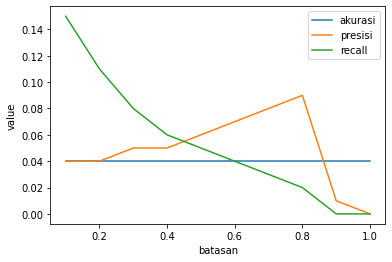

In [18]:
plt.plot(index, akurasi, label="akurasi")
plt.plot(index, presisi, label="presisi")
plt.plot(index, recall, label="recall")
plt.ylabel('value')
plt.xlabel('batasan')
plt.legend(loc="upper right")
plt.show()